In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data
data = pd.read_csv('data/correlation_data.csv')
data.head()

,pcc,max_pcc,lag,channel,probe,interval
0,0.135028,0.135028,0,1,1,upstate
1,0.871460,0.871460,0,1,1,upstate
2,0.410742,0.492546,-1,1,1,upstate
3,0.974499,0.964056,-1,1,1,upstate
4,0.749992,0.754925,-3,1,1,upstate


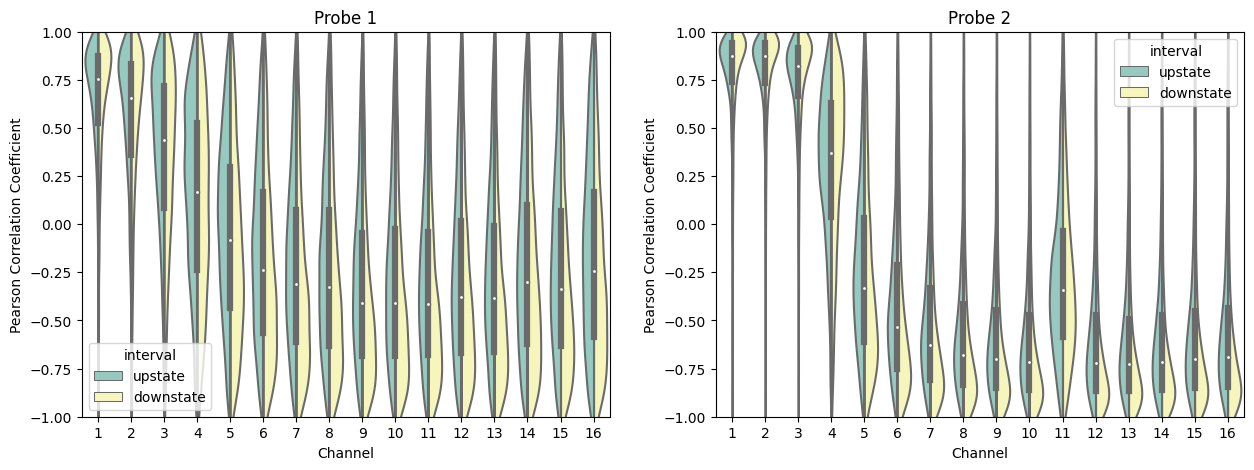

In [3]:
# Plot correlation data using violin plots
fig, ax = plt.subplots(1, 2,figsize=(15, 5))
sns.violinplot(x='channel', y='pcc', hue='interval', data=data[data['probe'] == 1], ax=ax[0], split=True, palette='Set3')
ax[0].set_title('Probe 1')
ax[0].set_xlabel('Channel')
ax[0].set_ylabel('Pearson Correlation Coefficient')
ax[0].set_ylim(-1, 1)

sns.violinplot(x='channel', y='pcc', hue='interval', data=data[data['probe'] == 2], ax=ax[1], split=True, palette='Set3')
ax[1].set_title('Probe 2')
ax[1].set_xlabel('Channel')
ax[1].set_ylabel('Pearson Correlation Coefficient')
ax[1].set_ylim(-1, 1)
plt.show()

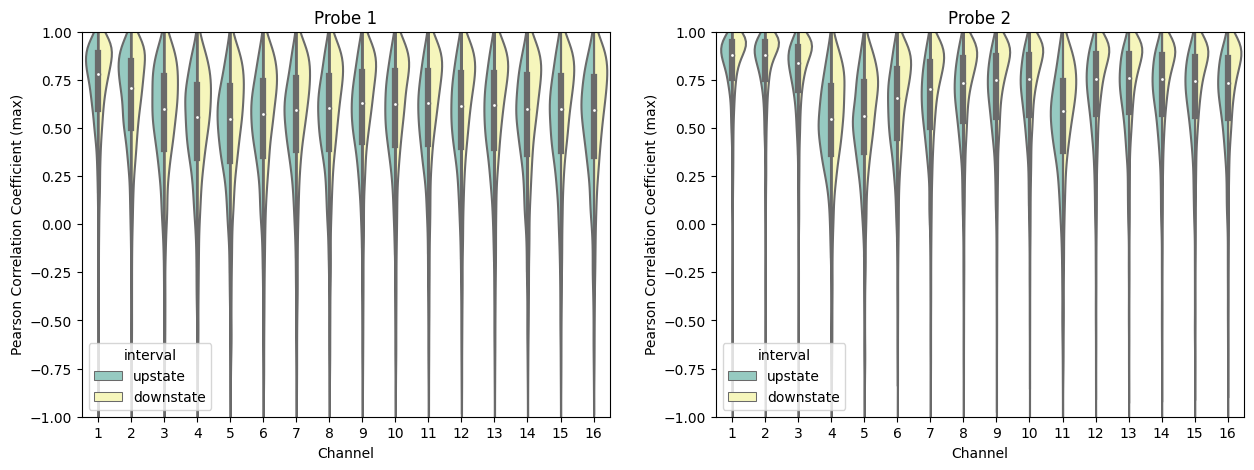

In [4]:
# Plot correlation data using violin plots
fig, ax = plt.subplots(1, 2,figsize=(15, 5))
sns.violinplot(x='channel', y='max_pcc', hue='interval', data=data[data['probe'] == 1], ax=ax[0], split=True, palette='Set3')
ax[0].set_title('Probe 1')
ax[0].set_xlabel('Channel')
ax[0].set_ylabel('Pearson Correlation Coefficient (max)')
ax[0].set_ylim(-1, 1)

sns.violinplot(x='channel', y='max_pcc', hue='interval', data=data[data['probe'] == 2], ax=ax[1], split=True, palette='Set3')
ax[1].set_title('Probe 2')
ax[1].set_xlabel('Channel')
ax[1].set_ylabel('Pearson Correlation Coefficient (max)')
ax[1].set_ylim(-1, 1)
plt.show()

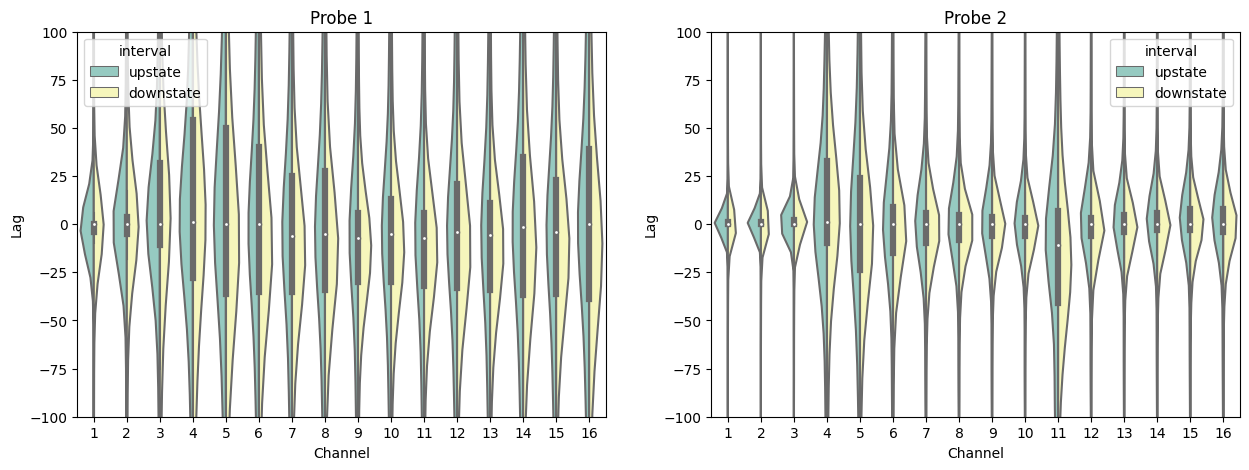

In [5]:
# Plot correlation data using violin plots
fig, ax = plt.subplots(1, 2,figsize=(15, 5))
sns.violinplot(x='channel', y='lag', hue='interval', data=data[data['probe'] == 1], ax=ax[0], split=True, palette='Set3')
ax[0].set_title('Probe 1')
ax[0].set_xlabel('Channel')
ax[0].set_ylabel('Lag')
ax[0].set_ylim(-100, 100)

sns.violinplot(x='channel', y='lag', hue='interval', data=data[data['probe'] == 2], ax=ax[1], split=True, palette='Set3')
ax[1].set_title('Probe 2')
ax[1].set_xlabel('Channel')
ax[1].set_ylabel('Lag')
ax[1].set_ylim(-100, 100)
plt.show()

Text(0, 0.5, 'Lag')

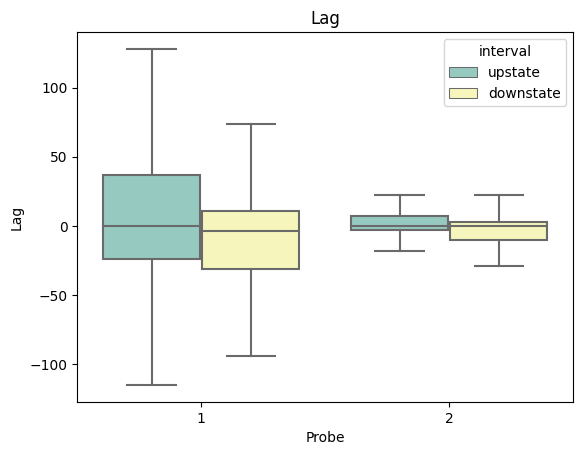

In [6]:
# Plot correlation data using violin plots
# fig, ax = plt.subplots(1, 2,figsize=(15, 5))
sns.boxplot(x='probe', y='lag', hue='interval', data=data, palette='Set3', showfliers=False)
plt.title('Lag')
plt.xlabel('Probe')
plt.ylabel('Lag')
# plt.ylim(-100, 100)

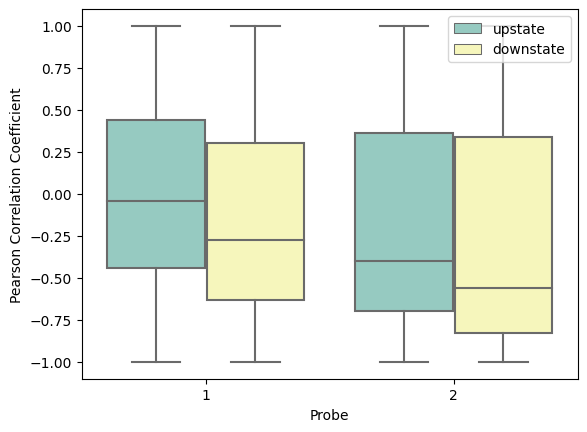

In [47]:
sns.boxplot(x='probe', y='pcc', hue='interval', data=data, palette='Set3', showfliers=False)
plt.xlabel('Probe')
plt.ylabel('Pearson Correlation Coefficient')
plt.legend(loc='upper right')
# plt.ylim(-100, 100)

Statistics=461734001.000, p=0.0000000000
Different distribution (reject H0)


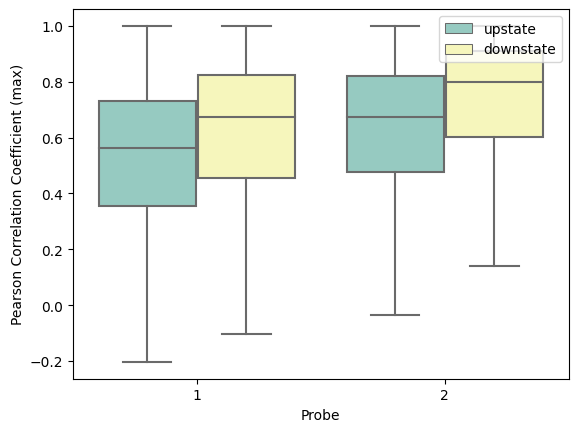

In [5]:
sns.boxplot(x='probe', y='max_pcc', hue='interval', data=data, palette='Set3', showfliers=False)
plt.xlabel('Probe')
plt.ylabel('Pearson Correlation Coefficient (max)')
plt.legend(loc='upper right')

# Test for normality
from scipy.stats import shapiro
from scipy.stats import normaltest

# # Shapiro-Wilk test
# stat, p = shapiro(data[data['interval'] == 'upstate']['max_pcc'])
# print('Statistics=%.3f, p=%.3f' % (stat, p))
# # interpret
# alpha = 0.05
# if p > alpha:
#     print('Sample looks Gaussian (fail to reject H0)')
# else:
#     print('Sample does not look Gaussian (reject H0)')


# stat, p = shapiro(data[data['interval'] == 'downstate']['max_pcc'])
# print('Statistics=%.3f, p=%.3f' % (stat, p))
# # interpret
# alpha = 0.05
# if p > alpha:
#     print('Sample looks Gaussian (fail to reject H0)')
# else:
#     print('Sample does not look Gaussian (reject H0)')

# Use Mann-Whitney U test
from scipy.stats import mannwhitneyu

# compare samples
data_pr = data[data['probe'] == 1]
stat, p = mannwhitneyu(data_pr[data_pr['interval'] == 'upstate']['max_pcc'], data_pr[data_pr['interval'] == 'downstate']['max_pcc'])
print('Statistics=%.3f, p=%.10f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')